# Air Passengers-Time series

## 1. Loading Python libraries

In [1]:
# let import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats

In [2]:
plt.style.use('ggplot')

## 2. Loading Data

In [4]:
df = pd.read_csv('AirPassengers.csv', 
                 index_col=0, #set index as date column
                 parse_dates=True) #parse date into datetime dtype

## 3. Exploring Data

In [5]:
df.shape

(144, 1)

In [6]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [10]:
# Dataset timeframe
print('Dataset spans', df.index.max() - df.index.min())

Dataset spans 4352 days 00:00:00


In [11]:
# Rename column and index
df.columns = ['air_passengers']
df.index.names = ['date']

In [12]:
df.head(3)

,air_passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132


**Documentation:**
* The data set is comprised of monthly air passenger figures (1000's) from Jan 1949 until Dec 1960 (144 months = 144 observations) without missing or zero values

### Data visualization

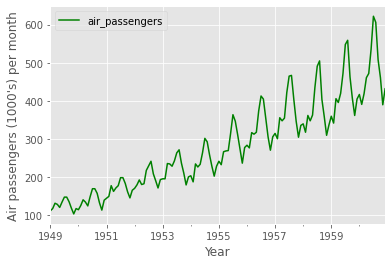

In [13]:
# Plot data
fig, ax = plt.subplots(figsize=(6,4))
df.plot(ax=ax, color='green')
plt.xlabel('Year')
plt.ylabel("Air passengers (1000's) per month");

In [14]:
# Subset air passenger figures according to date
N = 50
first = df.loc['1950':'1954'].sample(N, random_state=42)
second = df.loc['1955':'1959'].sample(N, random_state=42)

In [15]:
first.head(3)

,air_passengers
date,
1950-01-01,115
1950-06-01,149
1953-01-01,196


In [16]:
second.head(3)

,air_passengers
date,
1955-01-01,242
1955-06-01,315
1958-01-01,340


In [17]:
# Compute descriptive statistics
print('\033[1m1950-1954:\033[0m', stats.describe(first))
print('\033[1m1955-1959:\033[0m', stats.describe(second))

1950-1954: DescribeResult(nobs=50, minmax=(array([114], dtype=int64), array([302], dtype=int64)), mean=array([192.66]), variance=array([2071.73918367]), skewness=array([0.33352597]), kurtosis=array([-0.42179706]))
1955-1959: DescribeResult(nobs=50, minmax=(array([233], dtype=int64), array([559], dtype=int64)), mean=array([355.36]), variance=array([5923.78612245]), skewness=array([0.7416299]), kurtosis=array([0.12863719]))


In [18]:
def plot_histogram(data1, data2, label1, label2, xlabel):
    """Function to plot data distribution as histogram"""
    plt.figure(figsize=(6,4))
    bins = int(np.sqrt(len(data1)))

    plt.hist(data1, bins=bins, label=label1, alpha=0.5)
    plt.hist(data2, bins=bins, label=label2, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend();    

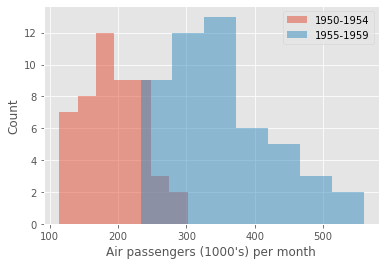

In [19]:
plot_histogram(data1 = first, data2 = second, label1 = '1950-1954', label2 = '1955-1959', xlabel = "Air passengers (1000's) per month")

In [20]:
# Function to compute CDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [21]:
# Define data in dict to be checked for normal distribution 
data = {'1950-1954': first,
        '1955-1959': second}

In [22]:
data['1950-1954'][:3]

,air_passengers
date,
1950-01-01,115
1950-06-01,149
1953-01-01,196


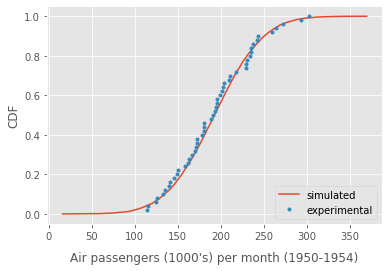

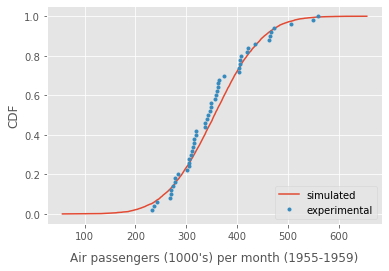

In [23]:
# Compute and plot CDF of experimental and simulated data (into separate figures)

for key, value in data.items():
    
    # Access respective dict data
    col = data[key].iloc[:,0]
    
    # Compute ECDF of experimental data
    x, y = ecdf(col)

    # Compute CDF of simulated data
    np.random.seed(42)
    mean = np.mean(col)
    std = np.std(col)
    samples = np.random.normal(mean, std, size=10000)
    x_theor, y_theor = ecdf(samples)
    
    # Plot ECDF and theoretical CDF
    plt.figure(figsize=(6,4))
    plt.plot(x_theor, y_theor)
    plt.plot(x, y, marker = '.', linestyle = 'none')
    plt.xlabel(f"Air passengers (1000's) per month ({key})", labelpad=10)
    plt.ylabel('CDF')
    plt.legend(('simulated', 'experimental'), loc = 'lower right');

In [24]:
# Confidence level
alpha = 0.05

In [25]:
def test_normality(data, alpha=0.05):
    """
    Function performing Shapiro_Wilk Test and returning 
    a significance message on data normality
    
    Inputs:
    Array of sample data, alpha: confidence level    
    """
    
    # Null Hypothesis Dictionary
    null_hypothesis = {'H0': "Data is normally distributed.",
                       'H1': "Data does not come from a normal distribution."}
    
    statistic, p_value = stats.shapiro(data)
    print("test_statistic =", np.round(statistic, 3))
    print("p_value =", np.round(p_value, 3))
    
    if p_value < alpha:
        print('We reject the null hypothesis.')
        print(null_hypothesis['H1'])
    else:
        print('We accept the null hypothesis.') 
        print(null_hypothesis['H0'])

In [26]:
# Test data for normality
test_normality(first)

test_statistic = 0.979
p_value = 0.524
We accept the null hypothesis.
Data is normally distributed.


In [27]:
# Test data for normality (here: loop over data in dict)
for key, value in data.items():
    
    # Access respective dict data
    col = data[key]
    
    # Perform test and print result
    print(f'Dataset \033[1m{key}:\033[0m')
    test_normality(col)
    print(f'\n')   

Dataset 1950-1954:
test_statistic = 0.979
p_value = 0.524
We accept the null hypothesis.
Data is normally distributed.


Dataset 1955-1959:
test_statistic = 0.949
p_value = 0.031
We reject the null hypothesis.
Data does not come from a normal distribution.




In [28]:
def zscore(data):
    """
    Function to center and scale data
    Input: Array of sample data    
    """
    zscore = (data - np.mean(data, axis=0)) / np.std(data)
    return zscore

In [29]:
# Normalize data using z-score
first_zscore = zscore(first)
second_zscore = zscore(second)

In [30]:
first_zscore.head(3)

,air_passengers
date,
1950-01-01,-1.723522
1950-06-01,-0.968954
1953-01-01,0.074125


In [31]:
# Alternatively, loop over a list of dataframes to normalize data

# List of dataframes to be normalized
df_list = [first, second]

# Empty list to store normalized data
df_list_zscore = [] 

# Loop to normalize data
for df in df_list:
    zs = zscore(df)
    df_list_zscore.append(zs)

In [32]:
df_list_zscore[0][:3]

,air_passengers
date,
1950-01-01,-1.723522
1950-06-01,-0.968954
1953-01-01,0.074125


In [33]:
# Perform Shapiro-Wilk Test to check if data is normally distributed 
# (here: loop over data in list)
for df in df_list_zscore:
        
    # Perform test and print result
    test_normality(df)
    print(f'\n')

test_statistic = 0.979
p_value = 0.524
We accept the null hypothesis.
Data is normally distributed.


test_statistic = 0.949
p_value = 0.031
We reject the null hypothesis.
Data does not come from a normal distribution.




In [34]:
# Alternatively, loop over data in dict to normalize data

# Data in dict to be normalized
data = {'1950-1954': first,
        '1955-1959': second}

# Empty dict to store normalized data
data_zscore = {'1950-1954': [],
               '1955-1959': []}
    
# Loop to normalize data
for key, value in data.items():
    
    # Access respective dict data
    col = data[key]
    zs = zscore(col)
    data_zscore[key].append(zs)

In [35]:
data_zscore['1950-1954'][0][:3]

,air_passengers
date,
1950-01-01,-1.723522
1950-06-01,-0.968954
1953-01-01,0.074125


In [36]:
# Perform Shapiro-Wilk Test to check if data is normally distributed 
# (here: loop over data in dict)
for key, value in data_zscore.items():
    
    # Access respective dict data
    col = data_zscore[key]
    
    # Perform test and print result
    print(f'Dataset \033[1m{key}:\033[0m')
    test_normality(col)
    print(f'\n')  

Dataset 1950-1954:
test_statistic = 0.979
p_value = 0.524
We accept the null hypothesis.
Data is normally distributed.


Dataset 1955-1959:
test_statistic = 0.949
p_value = 0.031
We reject the null hypothesis.
Data does not come from a normal distribution.




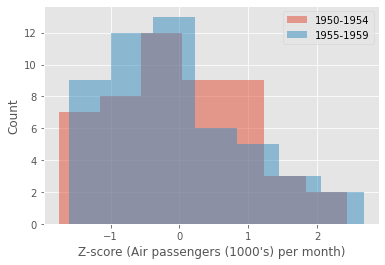

In [37]:
# Plot histogram for normalized data
plot_histogram(data1 = data_zscore['1950-1954'][0], data2 = data_zscore['1955-1959'][0], label1 = '1950-1954', label2 = '1955-1959', xlabel = "Z-score (Air passengers (1000's) per month)")

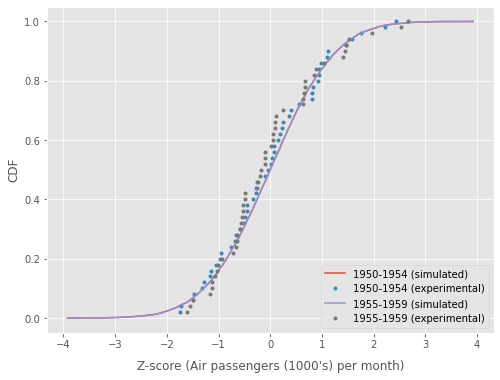

In [38]:
# Normalized data: Compute and plot CDF of experimental and simulated data

plt.figure(figsize=(8,6))

for key, value in data_zscore.items():
    
    # Access respective dict data
    col = data_zscore[key][0].iloc[:,0]
    
    # Compute ECDF of experimental data
    x, y = ecdf(col)

    # Compute CDF of simulated data
    np.random.seed(42)
    mean = np.mean(col)
    std = np.std(col)
    samples = np.random.normal(mean, std, size=10000)
    x_theor, y_theor = ecdf(samples)

    # Plot ECDF and theoretical CDF
    plt.plot(x_theor, y_theor, label=f'{key} (simulated)')
    plt.plot(x, y, marker = '.', linestyle = 'none', label=f'{key} (experimental)')
    plt.xlabel("Z-score (Air passengers (1000's) per month)", labelpad=10)
    plt.ylabel('CDF')
    plt.legend(loc = 'lower right');

### Log transformation

In [39]:
# Normalize data using log transformation (prior offset transformation not required due to absence of zeros)
first_log = np.log(first)
second_log = np.log(second)

In [40]:
first_log[:3]

,air_passengers
date,
1950-01-01,4.744932
1950-06-01,5.003946
1953-01-01,5.278115


In [41]:
# Alternatively, loop over data in dict to normalize data

# Data in dict to be normalized
data = {'1950-1954': first,
        '1955-1959': second}

# Empty dict to store normalized data
data_log = {'1950-1954': [],
            '1955-1959': []}
    
# Loop to normalize data
for key, value in data.items():
    
    # Access respective dict data
    col = data[key]
    log = np.log(col)
    data_log[key].append(log)

In [42]:
data_log['1950-1954'][0][:3]

,air_passengers
date,
1950-01-01,4.744932
1950-06-01,5.003946
1953-01-01,5.278115


In [43]:
# Perform Shapiro-Wilk Test to check if data is normally distributed 
# (here: loop over data in dict)
for key, value in data_log.items():
    
    # Access respective dict data
    col = data_log[key]
    
    # Perform test and print result
    print(f'Dataset \033[1m{key}:\033[0m')
    test_normality(col)
    print(f'\n')  

Dataset 1950-1954:
test_statistic = 0.984
p_value = 0.745
We accept the null hypothesis.
Data is normally distributed.


Dataset 1955-1959:
test_statistic = 0.98
p_value = 0.554
We accept the null hypothesis.
Data is normally distributed.




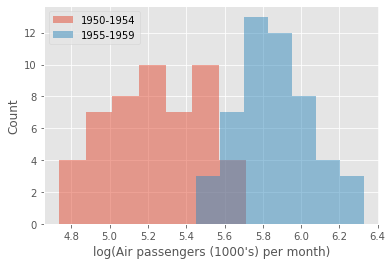

In [44]:
# Plot histogram for normalized data
plot_histogram(data1 = data_log['1950-1954'][0], data2 = data_log['1955-1959'][0], label1 = '1950-1954', label2 = '1955-1959', xlabel = "log(Air passengers (1000's) per month)")

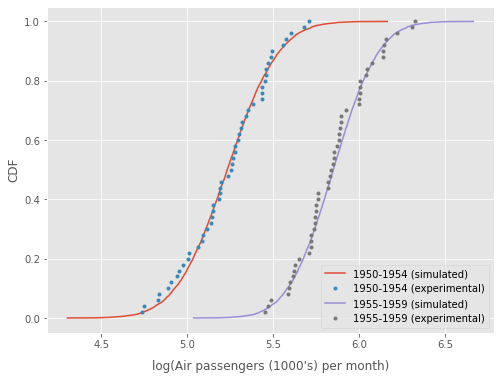

In [45]:
# Normalized data: Compute and plot CDF of experimental and simulated data

plt.figure(figsize=(8,6))

for key, value in data_log.items():
    
    # Access respective dict data
    col = data_log[key][0].iloc[:,0]
    
    # Compute ECDF of experimental data
    x, y = ecdf(col)

    # Compute CDF of simulated data
    np.random.seed(42)
    mean = np.mean(col)
    std = np.std(col)
    samples = np.random.normal(mean, std, size=10000)
    x_theor, y_theor = ecdf(samples)

    # Plot ECDF and theoretical CDF
    plt.plot(x_theor, y_theor, label=f'{key} (simulated)')
    plt.plot(x, y, marker = '.', linestyle = 'none', label=f'{key} (experimental)')
    plt.xlabel("log(Air passengers (1000's) per month)", labelpad=10)
    plt.ylabel('CDF')
    plt.legend(loc = 'lower right');

In [46]:
# Confidence level
alpha = 0.05

In [47]:
def ttest(data1, data2, alpha=0.05):
    """
    Function performing Student's t-test (two-tailed) and returning 
    a significance message
    
    Inputs:
    Two arrays of sample data, alpha: confidence level    
    """
    
    # Null Hypothesis Dictionary
    null_hypothesis = {'H0': "In the 1950's, monthly air passenger figures did not change from the first to the second half of the decade.",
                       'H1': "In the 1950's, monthly air passenger figures did change from the first to the second half of the decade."}
    
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    print("t_statistic =", t_statistic)
    print("p_value =", p_value)
    
    if p_value < alpha:
        print('We reject the null hypothesis.')
        print(null_hypothesis['H1'])
    else:
        print('We accept the null hypothesis.') 
        print(null_hypothesis['H0'])

In [48]:
ttest(first_log, second_log)

t_statistic = [-13.71717466]
p_value = [1.54953195e-24]
We reject the null hypothesis.
In the 1950's, monthly air passenger figures did change from the first to the second half of the decade.


### Mann-Whitney U-test

In [49]:
# Confidence level
alpha = 0.05

In [50]:
def mannwhitneyu(data1, data2, alpha=0.05):
    """
    Function performing Mann-Whitney U-test for non-parametric data
    and returning a significance message
    
    Inputs:
    Two arrays of sample data, alpha: confidence level    
    """
    
    # Null Hypothesis Dictionary
    null_hypothesis = {'H0': "In the 1950's, monthly air passenger figures did not change from the first to the second half of the decade.",
                       'H1': "In the 1950's, monthly air passenger figures did change from the first to the second half of the decade."}
    
    U_statistic, p_value = stats.mannwhitneyu(data1, data2)
    print("U_statistic =", U_statistic)
    print("p_value =", p_value)
    
    if p_value < alpha:
        print('We reject the null hypothesis.')
        print(null_hypothesis['H1'])
    else:
        print('We accept the null hypothesis.') 
        print(null_hypothesis['H0'])

In [51]:
mannwhitneyu(first, second)

U_statistic = [43.]
p_value = [8.96918542e-17]
We reject the null hypothesis.
In the 1950's, monthly air passenger figures did change from the first to the second half of the decade.
